In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
x = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]],dtype = float).T
y = np.array([45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]).reshape(-1,1)

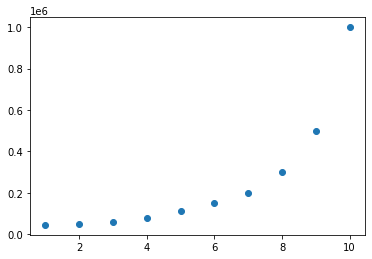

In [82]:
plt.scatter(x,y)

In [83]:
h = lambda x,theta: x@theta

cost_function = lambda x,y,theta: ((h(x,theta)-y).T@(h(x,theta)-y))/(2*x.shape[0])

In [94]:
def gradient_descent(x,y,theta,epochs,lr = 0.1):
    m = y.shape[0]
    
    J = []
    
    for epoch in range(epochs):
        h_x = h(x,theta)
        step = (1/m)*(x.T@(h_x-y)) + (1/m)*(2*(0.1)*(theta)) 
        
        # for rehularization i need to subtract theta
        #here regularization term = (0.001) * theta where 0.1 = (1/lambda)
        theta = theta - (lr*step)
        #Without regularization 
        #theta = theta - (lr*step)
        J.append(cost_function(x,y,theta))
    return J,theta

In [85]:
print((1/10)*(2*(0.1)*(theta)))

[[4869.59799972]
 [1014.48889073]
 [4356.27006249]]


## Regularization : 
### L1 = hypothesis + (1/lambda) * (theta) if theta > 0 else hypothesis - (1/lambda) * (theta)
### L2 = 2*(1/lambda)* (theta)

In [86]:
def normalize(x):
    for i in range(x.shape[1]):
        x[:,i] = (x[:,i] - np.mean(x[:,i]))/np.std(x[:,i])
    return x

### Adding More Quadratic Features

In [87]:
x3 = x**4
x = np.concatenate((x,x3),axis = 1)
x = normalize(x)
x = np.concatenate((np.ones((x.shape[0],1)),x),axis=1)
theta = np.zeros((x.shape[1],1))

In [88]:
x

array([[ 1.        , -1.5666989 , -0.78691732],
       [ 1.        , -1.21854359, -0.78225604],
       [ 1.        , -0.87038828, -0.76205716],
       [ 1.        , -0.52223297, -0.70767556],
       [ 1.        , -0.17407766, -0.59300807],
       [ 1.        ,  0.17407766, -0.38449347],
       [ 1.        ,  0.52223297, -0.04111249],
       [ 1.        ,  0.87038828,  0.48561217],
       [ 1.        ,  1.21854359,  1.25161589],
       [ 1.        ,  1.5666989 ,  2.32029206]])

In [89]:
loss,theta = gradient_descent(x,y,theta,50,0.1)

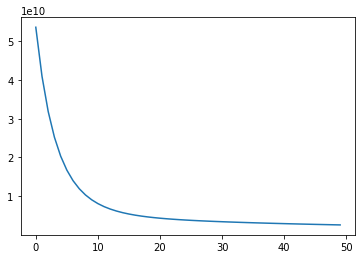

In [90]:
plt.plot(np.array(loss).reshape(-1,1))

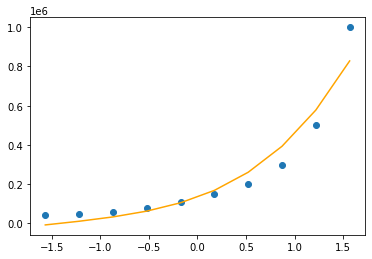

In [66]:
predictions = x@theta
plt.scatter(x[:,1],y)
plt.plot(x[:,1],predictions,"orange")